# K-Means, means choosing
---
K-Means is a popular machine learning algorithm that helps cluster data into logical groups.
However choosing the correct mean values to use as seed points is a challenge.
These notes attempts to offer an method based on cumulative histogram analysis, to better 'choose' mean seeds.

## Let us assume we have two datasets whose histograms are as follows:

In [10]:
%matplotlib inline

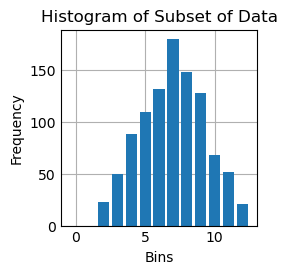

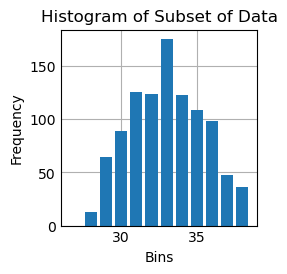

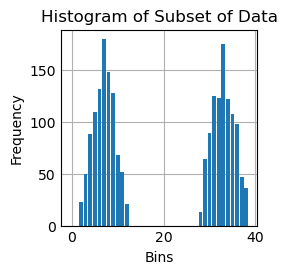

512


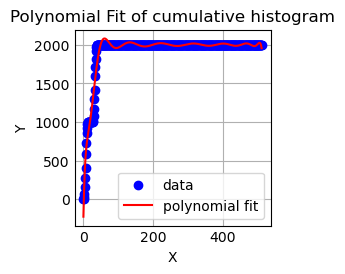

In [270]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 #Try to ensure histogram

def roll_die(sides=6, base=1):
    return np.random.randint(base, base + sides)

def roll_two_dice(sides, base):
    die1 = roll_die(sides, base)
    die2 = roll_die(sides, base)
    return die1+die2

def genSet(sides, base):
    dset = []
    for i in range(N):
        dset.append(roll_two_dice(sides, base))
    return dset

def Histo(dataset):
    H = np.zeros(512, dtype=np.uint32)
    for v in dataset:
        if v < 512 and v > 0:
            H[v] += 1
        else:
            print("overflow")
    return H

def CumulativeHisto(histo):
    H = np.zeros(512, dtype=np.uint32)
    H[0]=histo[0]
    for i in range(1, len(histo)):
        H[i] += H[i-1] + histo[i]
    return H

def hplot(data, minx, maxx):
    # Subset of data
    subset_indicies = np.arange(minx, maxx) #x
    subset_data = data[minx:maxx] #y
    #print(subset_indicies)
    #print(subset_data)


    plt.bar(subset_indicies,subset_data,align='center') # A bar chart

    # Labeling
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Histogram of Subset of Data')

    # Show plot
    plt.grid(True)
    plt.show()

def cplot(data, minx, maxx):

    # Generate x values for plotting the fitted curve
    x = np.arange(0, data.size) #it's evenly spaced.
    y = data
    
    # Fit a curve to the data
    coefficients = np.polyfit(x, y, 16)
    polynomial = np.poly1d(coefficients)

    # Generate x values for plotting the fitted curve. 
    x_fit = np.linspace(min(x), max(x), x.size)
    y_fit = polynomial(x_fit)

    # Subset of data
    # slice the data to the x-window 
    subset_indicies = x #x[minx:maxx] #x
    subset_data = y #y[minx:maxx] #y
    
    subset_cv_indicies = x_fit #x_fit[minx:maxx]
    subset_cv_data = y_fit #y_fit[minx:maxx]
    
    x1 = subset_indicies
    y1 = subset_data
    
    x2 = subset_cv_indicies
    y2 = subset_cv_data
  
    # Plot the original data points
    plt.scatter(x1, y1, color='blue', label='data')

    # Plot the fitted curve
    plt.plot(x2, y2, color='red', label='polynomial fit')

    # Labeling
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Fit of cumulative histogram')
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()
#==============================================================================
np.random.seed(1)

# two six sided dice 2-12 range(2*base, 2*(base-1)+sides*2)
set1 = genSet(6, 1)  #2 to 12
H1 = Histo(set1)
plot(H1, 0, 13)
#print(H1)
set2 = genSet(6, 14)  # 2*(14), 2*(14-1)+12 : 28, 26+12=38 
H2 = Histo(set2)
hplot(H2, 27, 39)
#print(H2)
H = H1+H2
#print(H)
hplot(H, 0, 39)
C=CumulativeHisto(H)
print(C.size)
cplot(C, 0, 100)


